# Yolov5 훈련

In [1]:
# 훈련환경 준비
!git clone https://github.com/WongKinYiu/yolov7 # 깃 저장소 복사
%cd yolov7#경로 이동
%pip install -qr requirements.txt # 필수(requirements)패키지 설치

'yolov7'에 복제합니다...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
오브젝트를 받는 중: 100% (1197/1197), 74.23 MiB | 9.64 MiB/s, 완료.
델타를 알아내는 중: 100% (519/519), 완료.
/Users/i/Downloads/crosswalk_project/yolov7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.4 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.4 requires scikit-learn>=1.3.2, but you have scikit-learn 0.24.2 which is incompatible.
tensorflow 2.4.1 requires flatbuffers~=1.12.0, but you have flatbuffers 20210226132247 which is incompatible.
tensorflow 2.4.1 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.4.1 requires typing-extensions~=3.7.4, but you have typing-extensions 4.11.0 which is incompatible.

[notice] A new release of pip is available: 

In [2]:
# 훈련 환경 테스트 v1
!python detect.py --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4

Namespace(weights='yolov7.pt', source='../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2 CPU

100%|██████████████████████████████████████| 72.1M/72.1M [00:06<00:00, 11.1MB/s]

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  

Namespace(weights=['yolov7-tiny.pt'], source='inference/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 200 layers, 6219709 parameters, 229245 gradients, 13.7 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

4 pers

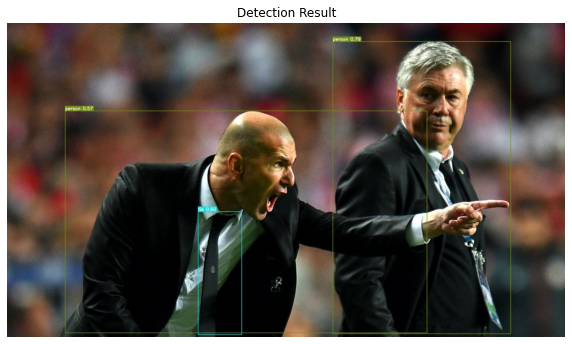

In [7]:
# 훈련 환경 테스트 v2
## 입력 데이터 해상도 640*640, confidence >=0.25인 객체만 검출
!python detect.py --weights yolov7-tiny.pt --img 640 --conf 0.25 --source inference/images

import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./runs/detect/exp2/zidane.jpg')

# OpenCV는 BGR 형식을 사용하므로 RGB로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Matplotlib으로 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.title("Detection Result")
plt.show()

In [ ]:
# yaml 파일 제작
text_lines='''
train:
    - ./VOCData/train
val:
    - ./VOCData/val
    
# number of classes
nc:20

# class names
names: ["aeroplane", "bicycle", "bird", "boat", "bottle", 
       "bus", "car", "cat", "chair", "cow", "diningtable", 
       "dog", "horse", "motorbike", "person", "pottedplant", 
       "sheep", "sofa", "train", "tvmonitor"]
'''

with open('./yolov7/vocdata.yaml','w') as f:
    f.write(text_lines)

In [ ]:
# 훈련
!python train.py --img 320 --batch 8 --epochs 20 --data vocdata.yaml --weights yolov7-tiny.pt --cache
## 훈련 해상도 : 640*640 => 320*320
## 배치 크기 : 16, 에포크 수 : 20, 가중치 : yolov7-tiny.pt
## cache : 훈련을 빠르게 하기 위해 사용. 데이터세트를 읽은 후 이진 파일로 저장

In [8]:
# 추론
!python detect.py --weights ./yolov7-tiny.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

Namespace(weights=['./yolov7-tiny.pt'], source='../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 200 layers, 6219709 parameters, 229245 gradients, 13.7 GFLOPS
 Convert model to Traced-model... 
 traced_scr

In [10]:
# 추론 테스트
!python detect.py --weights ./yolov7_tiny_voc.pt --img 640 --conf 0.25 --source ../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4 --view-img

Namespace(weights=['./yolov7_tiny_voc.pt'], source='../../DeepLearning4Projects/Chap7/data/crosswalk_cctv_01.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 200 layers, 6057889 parameters, 0 gradients, 13.2 GFLOPS
 Convert model to Traced-model... 
 traced_scri